## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

from tensorflow import keras

In [2]:
# import tensorflow as tf

# keras.__version__
# tf.version.VERSION

In [3]:
(train_imagesi,train_labels),(test_imagesi,test_labels) = fashion_mnist.load_data()

train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

y_t = to_categorical( train_labels)
y_tt = to_categorical(test_labels)

### 1.1 какой результата получен в нейросети в зависимости от: числа нейронов в слое(для 2-хслойной сети)

ответ: `точность конечно варьируется от количества нейронов в слое, количества слев и количества эпох, но не сильно +-0.01% (в лучшем случай +-0.1%) - мне кажется это не то, что нам надо, т.к. это как вариативность при разных запусках нейронной сети...`

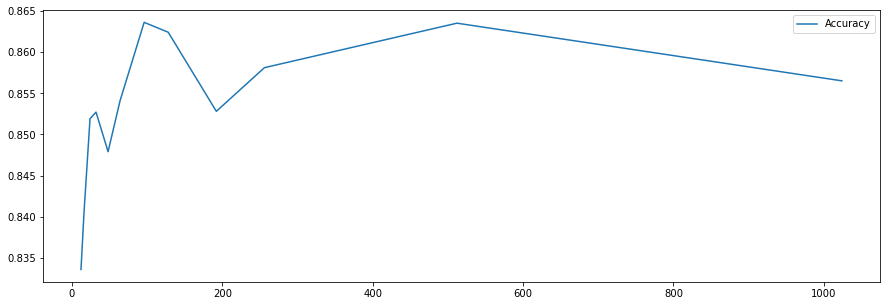

In [4]:
# число нейронов в слое
n_neiro = [12,16,24,32,48,64,96,128,192,256,512,1024]
accur = []

for n_neyro in n_neiro: 
    
    model_1 = Sequential([
      Dense(n_neyro, activation='tanh', input_shape=(784,)),
      Dense(10, activation='softmax'),
    ])

    model_1.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    model_1.fit(  
      train_images[:,:], y_t[:,:], epochs=5,
      batch_size=32, validation_split=0.2, verbose = 0
    )

    result = model_1.evaluate(test_images, y_tt, verbose = 0)

    accur.append(result[1])
#     print('Количество нейронов = ', n_neyro, ' :: ', result[1])

plt.figure(figsize=(15,5))
plt.plot(n_neiro, accur, label = 'Accuracy')
plt.legend()
plt.show()

### 1.1 какой результата получен в нейросети в зависимости от: числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).

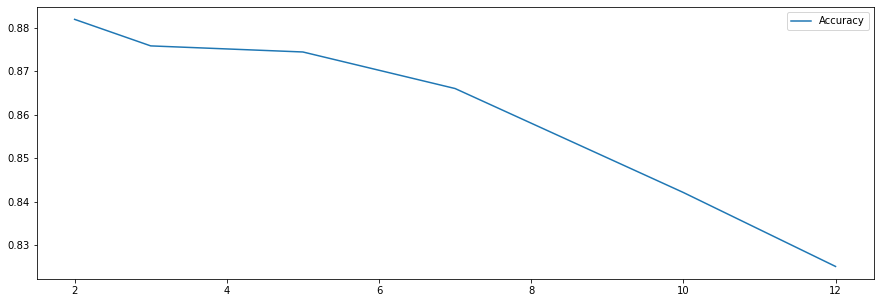

In [5]:
n_layers = [2,3,5,7,10,12]
accur = []

for i in n_layers: 
    
    model_2 = Sequential(name='my_model')
    model_2.add(Dense(     128, activation='relu', input_shape=(784,)))
    
    for k in range(i):
        model_2.add(Dense(128, activation='tanh')) 
    
    model_2.add(Dense(10, activation='softmax'))

    model_2.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    model_2.fit(  
      train_images[:,:], y_t[:,:], epochs=15,
      batch_size=32, validation_split=0.2, verbose = 0
    )

    result = model_2.evaluate(test_images, y_tt, verbose = 0)

    accur.append(result[1])
#     print('Количество нейронов = ', n_neyro, ' :: ', result[1])

plt.figure(figsize=(15,5))
plt.plot(n_layers, accur, label = 'Accuracy')
plt.legend()
plt.show()

### `после экспериментов остановился на значениях параметров ниже. Результат +- хороший`

In [6]:
model_best = Sequential(name='my_model')

model_best.add(Dense(128, activation='relu', input_shape=(784,)))
model_best.add(Dense(64, activation='tanh')) 
model_best.add(Dense(256, activation='tanh')) 
model_best.add(Dense(64, activation='tanh')) 
model_best.add(Dense(10, activation='softmax'))

model_best.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

model_best.fit(  
      train_images[:,:], y_t[:,:], epochs=20,
      batch_size=32, validation_split=0.2, verbose = 0
    )

result = model_best.evaluate(test_images, y_tt, verbose = 0)

print(result[1]) 

0.8762999773025513


In [7]:
# for i in [32,64,128,256,512,1024]:
#     model_best = Sequential(name='my_model')

#     model_best.add(Dense(128, activation='relu', input_shape=(784,)))
#     model_best.add(Dense(256, activation='tanh')) 
#     model_best.add(Dense(10, activation='softmax'))

#     model_best.compile(
#           optimizer='adam',
#           loss='categorical_crossentropy',
#           metrics=['accuracy'],
#         )

#     model_best.fit(  
#           train_images[:,:], y_t[:,:], epochs=20,
#           batch_size=32, validation_split=0.2, verbose = 0
#         )

#     result = model_best.evaluate(test_images, y_tt, verbose = 0)

#     print(i,' :: ',result[1])

### 2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

ответ: `лучший оптимизатор - SGD и ADAM. но как и с другими параметрами, разница - сотые доли процента...`

In [8]:
for i_optim in [keras.optimizers.RMSprop(),
                keras.optimizers.SGD( ),
                keras.optimizers.Adam( ),
                keras.optimizers.Nadam( )]:
    
    model_3 = Sequential(name='my_model')
    
    model_3.add(Dense(128, activation='relu', input_shape=(784,)))
    model_3.add(Dense(64, activation='tanh')) 
    model_3.add(Dense(256, activation='tanh')) 
    model_3.add(Dense(64, activation='tanh')) 
    model_3.add(Dense(10, activation='softmax'))

    model_3.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    model_3.fit(
        train_images[:,:], y_t[:,:], 
        epochs=20,
        batch_size=32, 
        validation_split=0.2, 
        verbose = 0
    )

    result = model_3.evaluate(test_images, y_tt, verbose = 0)

    print(i_optim, ' :: ', result[1])    

<tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop object at 0x0000026095E7DD30>  ::  0.8722000122070312
<tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000026095E7DF10>  ::  0.8736000061035156
<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000026095E7DB20>  ::  0.8736000061035156
<tensorflow.python.keras.optimizer_v2.nadam.Nadam object at 0x0000026095E7DFA0>  ::  0.8744000196456909


### 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

`Мне кажется, что качественно ничего сделать нельзя. максимальное улучшение - это до 87-88%
Для более значительного улучшения нужно применять светрочные слои и т.д.`

### 4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [9]:
# смотрим количество ошибок

prediction = model_best.predict(test_images)
pred = np.argmax(prediction,axis=1)
errors = pred == test_labels
x_false = test_images[~errors]
print(x_false.shape[0])

1237


In [10]:
# нашел наименование классов :)

class_labels = ['T-shirt/top',
                'Trouser',
                'Pullover',
                'Dress','Coat',
                'Sandal','Shirt',
                'Sneakers',
                'Bag',
                'Ankle boot']

In [11]:
from sklearn.metrics import classification_report

err = classification_report (test_labels, pred, target_names = class_labels)
print(err)

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.82      0.82      1000
     Trouser       0.98      0.97      0.97      1000
    Pullover       0.77      0.82      0.79      1000
       Dress       0.85      0.90      0.87      1000
        Coat       0.83      0.76      0.80      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.71      0.67      0.69      1000
    Sneakers       0.94      0.94      0.94      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

